## Gradient descent and Linear Regression: Coding Example

Below, we'll use Python to implement **linear regression**. To generate the linear model, we'll use **gradient descent**, which is a general optimization technique but which can find the global optimum in this case. 

### Linear models

In a typical regression problem, we're given a set of training instances, where each instance consists of a set of attributes $x_1$, $x_2$, $\ldots$, $x_k$, and we are attempting to learn a real-valued function (the **model** or **hypothesis** $h$) from the instances to some target attribute $y$. 

We can represent each training instance as a row vector $\mathbf{x} = \langle x_1,x_2,\ldots, x_k\rangle$. Here, to distinguish one training instance from another, we'll use superscripts: E.g.,  $\mathbf{x}^{(10)}$ refers to training instance \#10.  Similarly, we can use a superscript to refer to the target value for a training instance (e.g., $y^{(10)}$).  

A linear model has the form

$h_{\theta}(\mathbf{x}) = \theta_0 + \displaystyle\sum_{j=1}^{k} \theta_j x_j$

where each  $\theta_j$ is a real-valued constant (a **weight**), 
and $h_{\theta}(\mathbf{x})$ is the estimated value of $y$ for instance $\mathbf{x}$. Note that the function is really determine by the values we choose for each of the $\theta$s. The subscript in $h_\theta$ is used to indicate this. 


If we define $x_0$ to be a constant 1, then the function can be written more succinctly:

$h_{\theta}(\mathbf{x}) = \displaystyle\sum_{j=0}^{k} \theta_j x_j$

Note that the sequence of coefficients $\theta_0$, $\ldots$, $\theta_k$ also forms a vector, and so for any training instance $\mathbf{x}$, the sum above is just $\mathbf{\theta \cdot x}$ (the dot product of $\mathbf{\theta}$ and $\mathbf{x}$).  


$h_{\theta}(\mathbf{x})$ deﬁnes a $k$-dimensional **hyperplane**. If $k = 1$, it's a line dividing a 2d space. If $k = 2$, then it's a 2d plane. Intuitively, each weight $\theta_j$ represents the "slope" of the plane in the jth dimension.


### The Cost Function

The problem is to ﬁnd values for the weights $\theta_0$, $\ldots$ $\theta_k$ that best *ﬁt* the data. Speciﬁcally, we want to minimize the *mean squared error* between each $y^{(i)}$ and $h_\theta(x^{(i)})$, where $y^{(i)}$ and $h_\theta(x^{(i)})$ are the actual and predicted values for example $i$. The term $y^{(i)}-h_\theta(x^{(i)})$ is called the *residual* of $y^{(i)}$  with respect to $h_\theta(x^{(i)})$. More specifically, we want to minimize the below *cost function* $J(\theta)$:

$J(\theta) =  \frac{1}{2}\displaystyle\sum_{i=1}^{n}(h_\theta(\mathbf{x}^{(i)}) - y^{(i)})^2$


Note that $J$ is a funciton of $\theta$.  The space of possible values for $\theta$ defines an **error surface**, and we want to find the values for $\theta$ that correspond to the lowest point on that surface.  Implicitly, $J$ is also a function of the training set, but since we assume that the training set is fixed, we don't explictly symbolize it. 

Regarding the $\frac{1}{2}$, we could have just as easily used $\frac{1}{n}$ instead (where $n$ is the number of instances in the training set), but using $\frac{1}{2}$ doesn't change what weights yield the best $J$, and it ultimately simpliﬁes calculations (this is described below).

### Gradient Descent

Minimizing error is a standard objective in machine learning. For linear regression, it turns out that there is a unique global minimum for $J(\theta)$, and analytic techniques can be used to ﬁnd it. For other cost functions, however, techniques such as **gradient descent** are more appropriate.




In gradient descent, the gradient vector $\nabla J = \langle \frac{\partial J}{\partial \theta_0},\ldots, \frac{\partial J}{\partial \theta_k}\rangle $ at a given point on the error surface (where a point is defined by specific values for $\theta_0$, $\ldots$, $\theta_k$) represents the direction of greatest rate of increase in $J$ at the point. Intuitively,  $\frac{\partial J}{\partial \theta_j}$
 at a point on the error surface represents the slope (at that point) of the surface in the jth dimension.
 
The idea behind gradient descent is to adjust the current weights in the opposite direction of the gradient, thereby decreasing the error value. The weights are initialized (typically to 0), and then iteratively adjusted. The equation to **update** each existing weight $\theta_j$ to  a new value $θ_j'$ is

$\theta_j' := \theta_j - \alpha \frac{\partial J}{\partial\theta_j}$ 

where $\alpha$ is a small real-valued constant called the **learning 
rate**. Note that the weights are updated in parallel rather than sequentially. In a given iteration, updating one weight doesn't affect the updates of the others. 

If $\nabla J$ is 0 at a given point (that is, each $\frac{\partial J}{\partial \theta_i} = 0$), then further updates yield no improvement (this should be obvious given how the update rule is defined). That point constitutes a **local minimum** for $J(\theta)$. When reached, gradient descent stops. 

Note that in the context of linear regresssion, the cost function $J$ is **convex**. There is only one minimum (a **global minimum**), and gradient descent can safely be used to ﬁnd it. If the original function to be learned is not linear, however, then the error function might have many local minima. In such cases, gradient descent is not guaranteed to find the global minimum. 

##### Batch vs Stochastic Gradient Descent

In the simplest form of gradient descent, all instances in the data set are examined before updates are made. This is sometimes called **batch gradient descent**. In **stochastic gradient descent**, a randomly chosen instance (or small random sample of instances) is used instead of the entire data set. The gradient is then computed, and the weights are updated  accordingly.  Often, this reduces error more quickly. The algorithm might not converge to a minimum, but the results are typically good approximations.

If a good value for $\alpha$ is chosen, then $J$ should decrease with each iteration, quickly at first but then gradually tapering off.  If a too-large value for $\alpha$ is used, then $J$ might not converge. Instead, it might increase without bound or oscillate between ponts. If, in contrast, a too-small $\alpha$ is used, then gradient descent might take a very long time to converge.

### Computing the updates

In order to update $\theta_j$ to $\theta_j'$, we need to compute $\frac{\partial J}{\partial\theta_j}$, that is $\frac{\partial}{\partial\theta_j}$ $[ \frac{1}{2}\displaystyle\sum_{i=1}^{n}(h_\theta(\mathbf{x}^{(i)}) - y^{(i)})^2]$.  Below are some common rules for computing the derivative $f'(x)$ of a function $f(x)$ of one variable $x$. 

* If $f(x) = c$, where $c$ is a constant, then $f'(x) = 0$.

* If $f(x) = x^n$, then $f'(x) = nx^{n-1}$.

* If $f(x) = c g(x)$, where $c$ is a constant, then $f'(x) = c g'(x)$.

* If $f(x) = g(x) + h(x)$, then $f'(x) = g'(x) + h'(x)$.

* If $f(x) = g(h(x))$, then $f'(x) = g'(h(x))h'(x)$.


When computing partial derivatives of functions of multiple variables, e.g.,  $\frac{\partial J}{\partial\theta_j}$, we treat the other variables ($\theta_i$ where $i\neq j$) as constants. 

Below are steps showing the derivation of $\frac{\partial J}{\partial\theta_j}$: 

* $\frac{\partial J}{\partial\theta_j}$ =

* $\frac{\partial}{\partial\theta_j}$ $[ \frac{1}{2}\displaystyle\sum_{i=1}^{n}(h_\theta(\mathbf{x}^{(i)}) - y^{(i)})^2]$ =

* $\frac{1}{2}\frac{\partial}{\partial\theta_j}$ $[\displaystyle\sum_{i=1}^{n}(h_\theta(\mathbf{x}^{(i)}) - y^{(i)})^2]$ =

* $\frac{1}{2}\frac{\partial}{\partial\theta_j}$ $[(h_\theta(\mathbf{x}^{(1)}) - y^{(1)})^2$ $+\ldots+$ $(h_\theta(\mathbf{x}^{(n)}) - y^{(n)})^2]$ = 

* $\frac{1}{2}$ $[\frac{\partial}{\partial\theta_j}(h_\theta(\mathbf{x}^{(1)}) - y^{(1)})^2$ $+\ldots+$ $\frac{\partial}{\partial\theta_j}(h_\theta(\mathbf{x}^{(n)}) - y^{(n)})^2]$ = 

* $\frac{1}{2}$ $[2(h_\theta(\mathbf{x}^{(1)}) - y^{(1)})\frac{\partial}{\partial\theta_j}(h_\theta(\mathbf{x}^{(1)}) - y^{(1)})$ $+\ldots+$ $2(h_\theta(\mathbf{x}^{(n)}) - y^{(n)})\frac{\partial}{\partial\theta_j}(h_\theta(\mathbf{x}^{(n)}) - y^{(n)})]$ = 

* $\frac{2}{2}$ $[(h_\theta(\mathbf{x}^{(1)}) - y^{(1)})\frac{\partial}{\partial\theta_j}(h_\theta(\mathbf{x}^{(1)}) - y^{(1)})$ $+\ldots+$ $(h_\theta(\mathbf{x}^{(n)}) - y^{(n)})\frac{\partial}{\partial\theta_j}(h_\theta(\mathbf{x}^{(n)}) - y^{(n)})]$ = 

*  $[(h_\theta(\mathbf{x}^{(1)}) - y^{(1)})(\frac{\partial}{\partial\theta_j} h_\theta(\mathbf{x}^{(1)}) - \frac{\partial}{\partial\theta_j} y^{(1)})$ $+\ldots+$ $(h_\theta(\mathbf{x}^{(n)}) - y^{(n)})(\frac{\partial}{\partial\theta_j} h_\theta(\mathbf{x}^{(n)}) - \frac{\partial}{\partial\theta_j} y^{(n)})]$ =

*  $[(h_\theta(\mathbf{x}^{(1)}) - y^{(1)})\frac{\partial}{\partial\theta_j} h_\theta(\mathbf{x}^{(1)})$ $+\ldots+$ $(h_\theta(\mathbf{x}^{(n)}) - y^{(n)})\frac{\partial}{\partial\theta_j} h_\theta(\mathbf{x}^{(n)})]$

Note that $h_\theta(\mathbf{x}^{(i)})$ = $\theta_0 + \theta_1 x_1^{(i)} + \ldots + \theta_1 x_k^{(i)}$ and all $\theta_m$ other than $\theta_j$ are treated as constants,  and so  $\frac{\partial}{\partial\theta_j} h_\theta(\mathbf{x}^{(i)})$ = $x_j^{(i)}$. From this: 

* $[(h_\theta(\mathbf{x}^{(1)}) - y^{(1)})x_j^{(1)}$ $+\ldots+$ $(h_\theta(\mathbf{x}^{(n)}) - y^{(n)})x_j^{(n)})]$ = 
 
* $\displaystyle\sum_{i=1}^{n}[(h_\theta(\mathbf{x}^{(i)}) - y^{(i)})x_j^{(i)}]$ =

* $\displaystyle\sum_{i=1}^{n}(\displaystyle\sum_{m=0}^{k}{[\theta_m x_m}^{(i)}] - y^{(i)})x_j^{(i)}$


Plugging this result into our update rule yields the following.

$\theta_j' := \theta_j - \alpha \displaystyle\sum_{i=1}^{n}(\displaystyle\sum_{m=0}^{k}{[\theta_m x_m}^{(i)}] - y^{(i)})x_j^{(i)}$ 


Note that this is for a single weight $\theta_j$. We would need to compute a result for all other weights, too. 

### Scaling

When fitting a function of several attributes, it's often the case that attributes will have very different magnitudes. This can drastically reduce the efficiency of gradient descent. As such, it is good practice to **scale** the inputs (the target is left alone). Different techniques can be used, but sometimes the standard score is used. Each $x^{(i)}_j$ is replaced with 

$\frac{x^{(i)}_j-\mu_j}{\sigma_j}$

where $\mu_j$ is the mean of $x_j$ across all instances and $\sigma_j$ is the standard deviation. In practice, not standardizing the values can make tuning the gradient descent procedure more difficult.

## Coding Linear Regression with Gradient Descent

Below is a sample program implementing linear regression using gradient descent. It is possible to specify the learning rate and number of iterations, as well as whether the input data should be scaled. The function works with Numpy arrays. 


In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [11]:
# the data set used for the examples
house_data = "..\\data-sets\\2015_clarke_co_house_sales.csv"

In [12]:
# a function creating a linear model using gradient descent. 
#
# input: 
#   in - training data encoded as an (n x m) numpy array (1 instance per row).
#   alpha - the learning rate, a floating point number. 
#   iterations - the number of iterations to run gradient descent. 
#
# output: the weights (coefficients) of the linear model.  
#
# For the input, assume that the target attribute is in the last column. 
def gradient_descent(indata, alpha, iterations, scale=True):
    # get the number of rows and columns in the input data. 
    # get the number of rows and columns in the input data. 
    (rows, cols) = indata.shape; 
   
    # create a row vector of weights, one for each input column,
    # initialized to 0. 
    weights = np.zeros(cols);
    
    # 1)Prepend  a column of 1s to the instances (for the y-intercept)
    instances = np.hstack((np.ones((rows,1)), indata[:,:-1]))

    # 2)Separate the input attributes from the target attribute, forming
    # two numpy arrays.
    targets = indata[:,-1] 

    # 3) 
    # Standardize the inputs. For each value x of an attribute, compute 
    # (x-mu)/sd, where mu and sd are the mean and standard deviation of values 
    # for that attribute. 
    
    # scale each column (from index 2 to the end column)
    if scale:
        stdev = np.std(instances,axis=0);
        avg = np.mean(instances,axis=0);
        for i in range(1, cols): # skip the ones column
            instances[:,i] = (instances[:,i] - avg[i])/stdev[i];

    # initialize a list to store the error at each iteration (for graphing). 
    errList = np.zeros(iterations);
    
    # run gradient descent for the given number of instances. 
    for i in range(iterations):
        # Compute model for each instance: Multiply instance input matrix
        # (n x m) by (m x 1) weight vector to get (n x 1) matrix of predictions.  
        model = instances.dot(weights);
        
        # 5) For each instance D, compute the difference D_i between the target and the predicted value. 
        diff = (model - targets);
        # 6) Update the weights w_1, w_2, ..., w_m. For each column position j: 
        for j in range(cols):
          # 6.1) multiply each instance i's attribute value x_j by D_i
          # 6.2) Sum the results of 6.1 together. 
            dJ = np.sum(diff * instances[:,j])
          # 6.3) multiply 6.2's value by alpha and subract the result
          # from w_j. This yields the new value for w_j
            weights[j] = weights[j] - alpha*dJ
        # add the error for this iteration to the stored list of errors.
        errList[i] = err(model, targets)
    return (weights, errList)

In [13]:
# compute the mean squared error
def err(model, targets):
    it = np.sum((model - targets)*(model - targets))/len(targets)
    return it

coefficients: [300804.78600823  85375.98156016   1451.90625206]
mse: 57200795712.55842


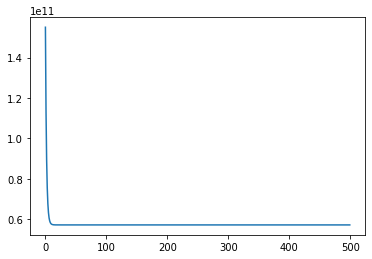

In [14]:
df = pd.read_csv(filepath_or_buffer=house_data,header=0)
data = df.values
(w,e) = gradient_descent(data, 0.0005, 500)
scaled_e = e[-1]
print("coefficients:", w)
print("mse:",scaled_e)
plt.plot(e)
plt.show()
old_e = scaled_e

## Unscaled


coefficients: [1.97511987e-01 1.29705073e+02 2.20925354e-02]
mse: 58711376606.48234
old: 57200795712.55842


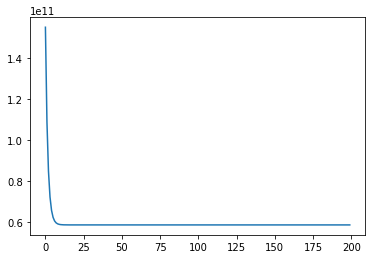

In [15]:
df2 = pd.read_csv(filepath_or_buffer=house_data,header=0)
data2 = df2.values
(w,e) = gradient_descent(data2, 00.0000000001, 200,scale=False)
unscaled_e = e[-1]
print("coefficients:", w)
print("mse:", unscaled_e)
print("old:", old_e)

plt.plot(e)
plt.show()

## Compare output to scikit-learn

In [16]:
from sklearn import linear_model
import sklearn.metrics as metrics

df3 = pd.read_csv(filepath_or_buffer=house_data,header=0)

x_train=df3.values[:,:-1]
y_train=df3.values[:,-1]

avg = np.mean(x_train,axis=0);
stdev = np.std(x_train,axis=0);
for i in range(x_train.shape[1]): 
    x_train[:,i] = (x_train[:,i] - avg[i])/stdev[i]

regr = linear_model.LinearRegression()
# fit the data
regr.fit(x_train, y_train)

# print out the linear model
print("scikit coefficients: ", regr.coef_)
print("scikit intercept: ", regr.intercept_)

e = metrics.mean_squared_error(y_train,regr.predict(x_train))
print("scikit mse:", e)
print("hand-rolled mse:",scaled_e)
print("hand/scikit", scaled_e/e)

scikit coefficients:  [85375.98156016  1451.90625206]
scikit intercept:  300804.78600823047
scikit mse: 57200795712.5584
hand-rolled mse: 57200795712.55842
hand/scikit 1.0000000000000002


## scikit unscaled

In [17]:
df4 = pd.read_csv(filepath_or_buffer=house_data,header=0)

x_train=df4.values[:,:-1]
y_train=df4.values[:,-1]

regr = linear_model.LinearRegression()
# fit the data
regr.fit(x_train, y_train)

# print out the linear model
print("coefficients: ", regr.coef_)
print("intercept: ", regr.intercept_)
#compute predicted values on test test;
predicted = regr.predict(x_train);

e = metrics.mean_squared_error(y_train,regr.predict(x_train))
print("scikit mse:", e)
print("hand-rolled mse:",unscaled_e)
print("hand/scikit", unscaled_e/e)

coefficients:  [ 91.26137924 205.39784564]
intercept:  99562.07394192755
scikit mse: 57200795712.5584
hand-rolled mse: 58711376606.48234
hand/scikit 1.026408389518125
